# Import Libraries

In [22]:
import pandas as pd
import numpy as np
import multiprocessing
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Generate Dataset

In [2]:
import random

def GenerateDataset(n):
	"""
  Tạo một dãy số nguyên ngẫu nhiên có kích thước n.
	- Parameters:
		n (int): Kích thước của dãy số cần tạo.
	- Returns:
		list of int: Một danh sách chứa các số nguyên ngẫu nhiên được tạo ra trong khoảng từ -10^6 đến 10^6.
  """
	return [random.randint(-1000000, 1000000) for _ in range(n)]

# Tạo các bộ dữ liệu
dataset = {}
# Dãy nhỏ (10^2 phần tử)
dataset[1] = GenerateDataset(100)
dataset[2] = sorted(dataset[1]) # Tăng dần
dataset[3] = dataset[2][::-1] # Giảm dần

# Dãy trung bình (10^4 phần tử)
dataset[4] = GenerateDataset(10000)
dataset[5] = sorted(dataset[4]) # Tăng dần
dataset[6] = dataset[5][::-1] # Giảm dần

# Dãy lớn (10^6 phần tử)
dataset[7] = GenerateDataset(1000000)
dataset[8] = sorted(dataset[7]) # Tăng dần
dataset[9] = dataset[8][::-1] # Giảm dần

# Merge sort parallel

### Number of processors

In [3]:
import os

# Get the number of processors.
num_processors = os.cpu_count()

# Print the number of processors.
print(num_processors)

2


### Implement Algorithm

In [6]:
class merge_sort_parallel():
  """
	Lớp merge_sort_parallel thực hiện thuật toán sắp xếp Merge Sort song song bằng sử dụng thư viện multiprocessing.
  - Methods:
	  merge(left_arr: list, right_arr: list) -> list: Sắp xếp và trộn hai mảng đã được sắp xếp thành một mảng sắp xếp.
	  merge_sort(data: list) -> list: Sắp xếp một danh sách số nguyên bằng thuật toán Merge Sort.
	  separate_input(data: list, num_parts: int = os.cpu_count()) -> list: Chia dữ liệu đầu vào thành các phần nhỏ để thực hiện sắp xếp song song.
    run_parallel(data: list) -> list: Thực hiện sắp xếp Merge Sort song song trên dữ liệu đầu vào.
	"""
  def merge(self, left_arr : list, right_arr : list) -> list:
      """
      Sắp xếp và trộn hai mảng đã được sắp xếp thành một mảng sắp xếp.
      - Parameters:
        left_arr (list): Mảng con trái (đã được sắp xếp).
        right_arr (list): Mảng con phải (đã được sắp xếp).
      - Returns:
        list: Mảng kết hợp từ hai mảng con đã được sắp xếp.
      """
      i = 0
      j = 0
      merged_arr = []
      while ((i < len(left_arr)) and (j < len(right_arr))):
        if (left_arr[i] > right_arr[j]):
          merged_arr.append(right_arr[j])
          j += 1
        else:
          merged_arr.append(left_arr[i])
          i += 1
      while (j < len(right_arr)):
        merged_arr.append(right_arr[j])
        j += 1
      while (i < len(left_arr)):
        merged_arr.append(left_arr[i])
        i += 1
      return merged_arr

  def merge_sort(self, data) -> list:
    """
	  Sắp xếp một danh sách số nguyên bằng thuật toán Merge Sort.
		- Parameters:
		  data (list): Danh sách số nguyên cần sắp xếp.
		- Returns:
	    list: Danh sách đã được sắp xếp.
		"""
    mid = round((len(data) - 2) / 2)
    if (len(data) == 1):
      return [data[0]]
    left_arr = self.merge_sort(data[ : mid + 1])
    right_arr = self.merge_sort(data[mid + 1 : ])
    return self.merge(left_arr, right_arr)

  def separate_input(self, data : list, num_parts : int = os.cpu_count()):
    """
    Chia dữ liệu đầu vào thành các phần nhỏ để thực hiện sắp xếp song song.
		- Parameters:
	    data (list): Danh sách số nguyên cần sắp xếp.
      num_parts (int): Số lượng phần con cần chia dữ liệu thành (mặc định là số lõi CPU).
		- Returns:
      list of list: Danh sách các danh sách con (sublists) chứa các phần của dữ liệu.
		"""
    sublists = np.array_split(data, num_parts, axis = 0)
    sublists = [sublist.tolist() for sublist in sublists]
    return sublists

  def run_parallel(self, data : list()):
    """
    Thực hiện sắp xếp Merge Sort song song trên dữ liệu đầu vào.
		- Parameters:
	    data (list): Danh sách số nguyên cần sắp xếp.
		- Returns:
      list: Danh sách đã được sắp xếp.
		"""
    pool = multiprocessing.Pool()
    partitions = self.separate_input(data)
    sorted_partitions = pool.map(self.merge_sort, partitions)
    merged_all = sorted_partitions[0]
    for partition in sorted_partitions[1 : ]:
      merged_all = self.merge(merged_all, partition)
    pool.close()
    pool.join()
    return merged_all

# Validation

In [15]:
sorter = merge_sort_parallel()
parallel_times = []
ms_times = []
checks = []
for current_dataset in range(1, 10):
  # Merge Sort song song
  start_time = time.time() # Thời gian bắt đầu chạy
  parallel_sorted = sorter.run_parallel(dataset[current_dataset])
  end_time = time.time() # Thời gian chạy xong
  # Tính thời gian chạy của thuật toán
  parallel_time = end_time - start_time

  # Merge Sort tuần tự
  start_time = time.time() # Thời gian bắt đầu chạy
  sorter.separate_input(dataset[current_dataset])
  ms_sorted = sorter.merge_sort(dataset[current_dataset])
  end_time = time.time() # Thời gian chạy xong
  # Tính thời gian chạy của thuật toán
  ms_time = end_time - start_time

  # Kiểm tra xem thuật toán có sắp xếp đúng không
  if current_dataset < 4:
    compare_dataset = 2
  elif current_dataset < 7:
    compare_dataset = 5
  else:
    compare_dataset = 8
  if parallel_sorted == ms_sorted == dataset[compare_dataset]:
    parallel_times.append(parallel_time)
    ms_times.append(ms_time)
    checks.append(True)
  else:
    checks.append(False)
    #print(parallel_time, ms_time) # In thời gian chạy của thuật toán song song và tuần tự
validation = pd.DataFrame({"Dataset" : range(1, 10), "Mergesort time" : ms_times, "Parallel time" : parallel_times, "Check" : checks})
validation

,Dataset,Mergesort time,Parallel time,Check
0,1,0.000542,0.060484,True
1,2,0.000464,0.062379,True
2,3,0.000462,0.051406,True
3,4,0.050834,0.107356,True
4,5,0.044453,0.105069,True
5,6,0.044283,0.099721,True
6,7,9.730369,8.065826,True
7,8,8.245790,8.176266,True
8,9,9.427133,8.438413,True


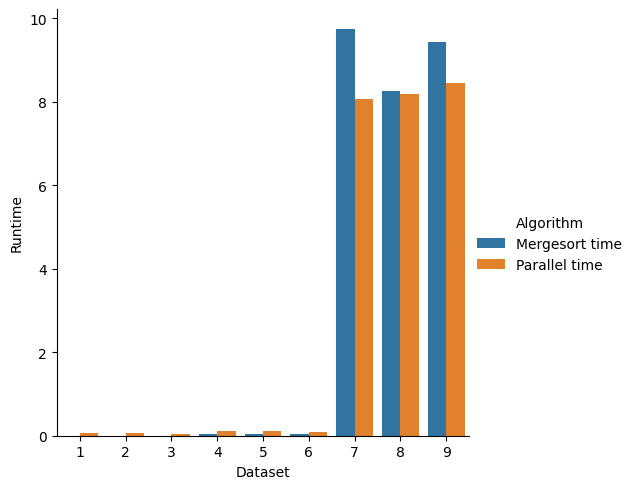

In [29]:
df = pd.melt(validation.drop('Check', axis = 1), id_vars="Dataset", var_name = "Algorithm", value_name = "Runtime")
sns.catplot(x = 'Dataset', y='Runtime', hue='Algorithm', data=df, kind='bar')